In [1]:
import glob

import imageio
import matplotlib
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import xarray as xr

plt.rcParams.update(
    {
        "text.usetex": True,
        "font.family": "serif",
        "font.sans-serif": ["Computer Modern Roman"],
        "axes.grid": False,
        "savefig.dpi": 300,
        "figure.figsize": [8, 6],
        "font.size": 14,
    }
)
plt.style.use(["seaborn-colorblind"])
xr.set_options(keep_attrs=True, display_expand_data=False)

In [12]:
colors = {
    "icing_severity_index_aviation": [
        "#e06666",
        "#ffffff",
        "#eff3ff",
        "#bdd7e7",
        "#6baed6",
        "#2171b5",
    ],
    "eddy_dissipation_rate_aviation": [
        "#ffffff",
        "#ffffcc",
        "#ffeda0",
        "#fed976",
        "#feb24c",
        "#fd8d3c",
        "#fc4e2a",
        "#e31a1c",
        "#bd0026",
        "#800026",
    ],
    "air_temperature_aviation": "magma",
    "wind_speed_aviation": "viridis",
    "wind_direction_aviation": "twilight",
}

In [40]:
levels = {
    "icing_severity_index_aviation": range(-1, 6),
    "eddy_dissipation_rate_aviation": np.linspace(0, 1.0, 11),
    "air_temperature_aviation": np.linspace(-60, 30, 21),
    "wind_speed_aviation": np.linspace(0, 40, 21),
    "wind_direction_aviation": np.linspace(0, 360, 21),
}

In [41]:
hours = np.arange(0, 24, step=3)
batch_hours = [6, 9] * 4

In [61]:
def make_plot(ds, ax, levels, colors, extend):
    ds[variable].sel(lev=height).plot(
        ax=ax,
        levels=levels,
        colors=colors,
        extend=extend,
    )

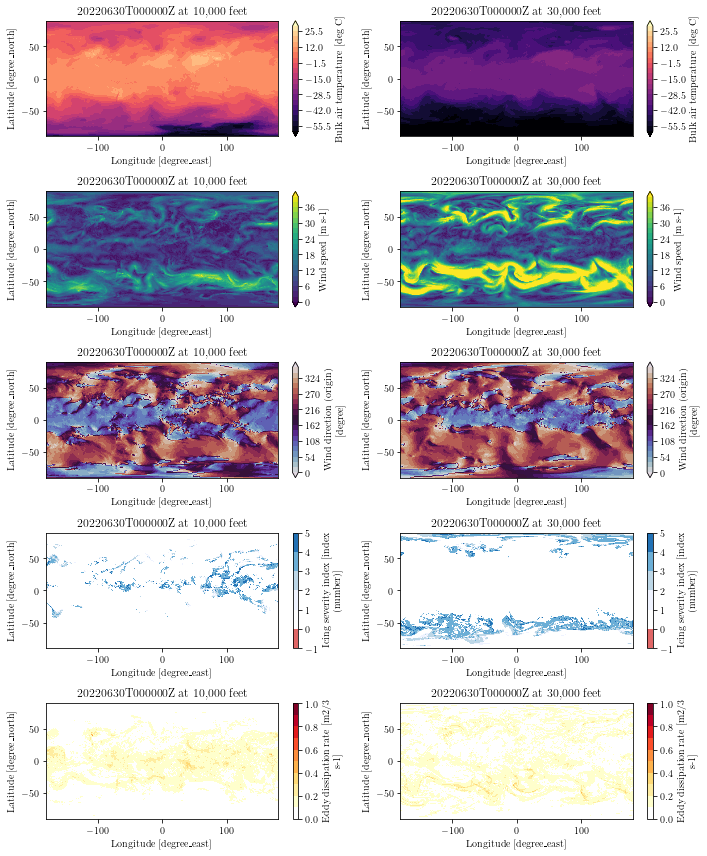

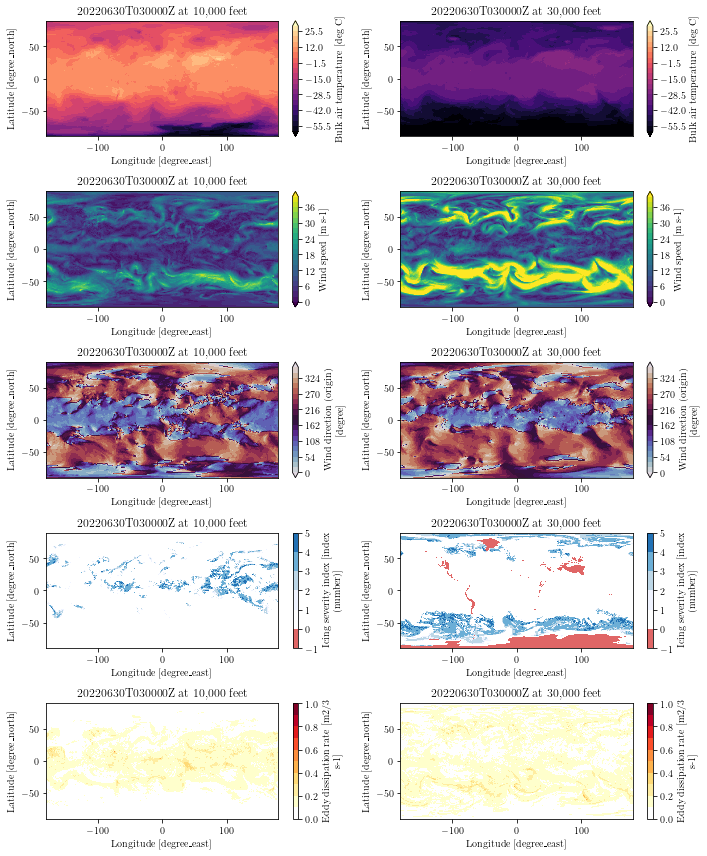

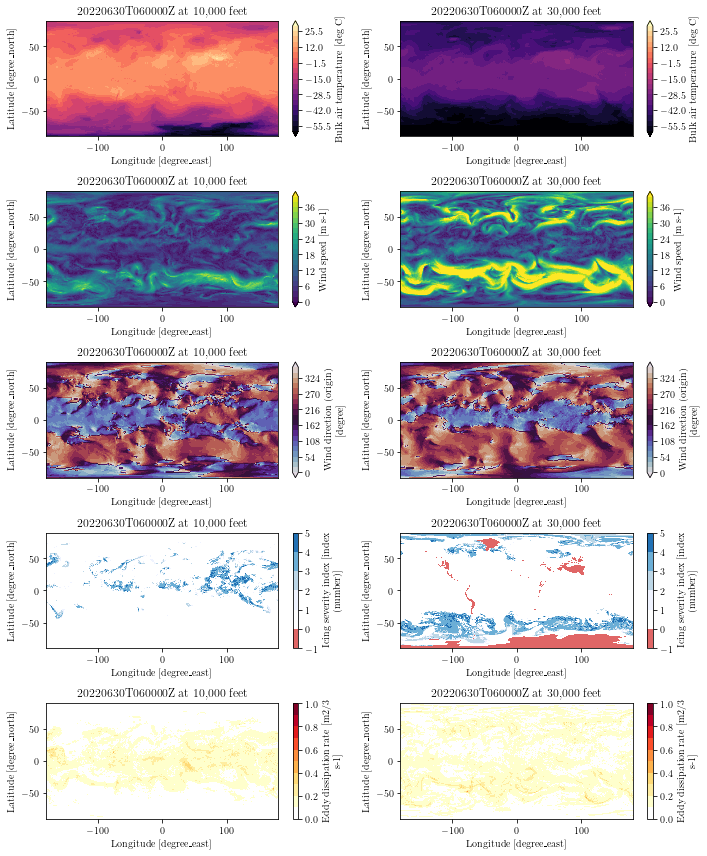

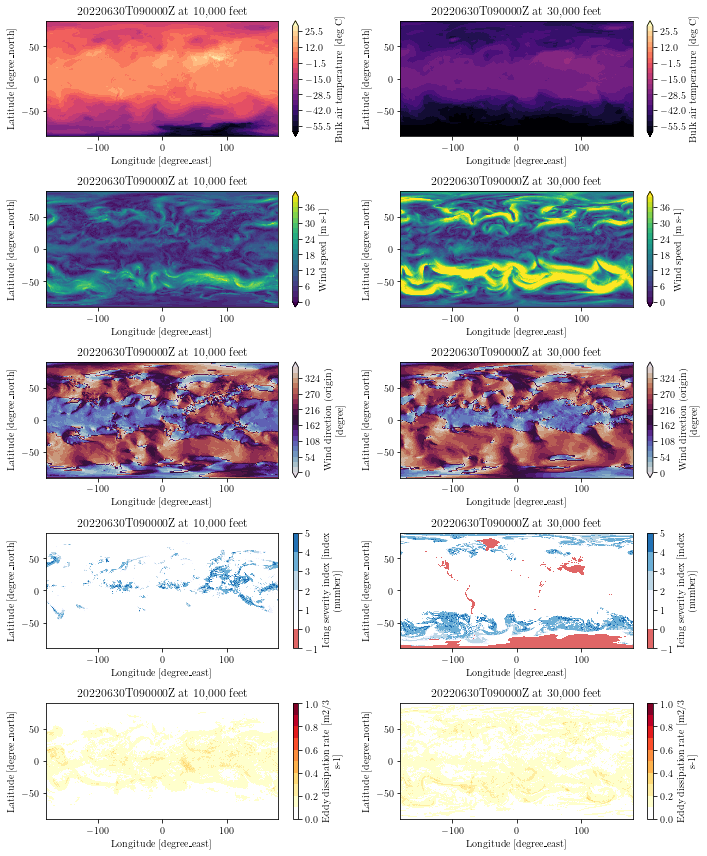

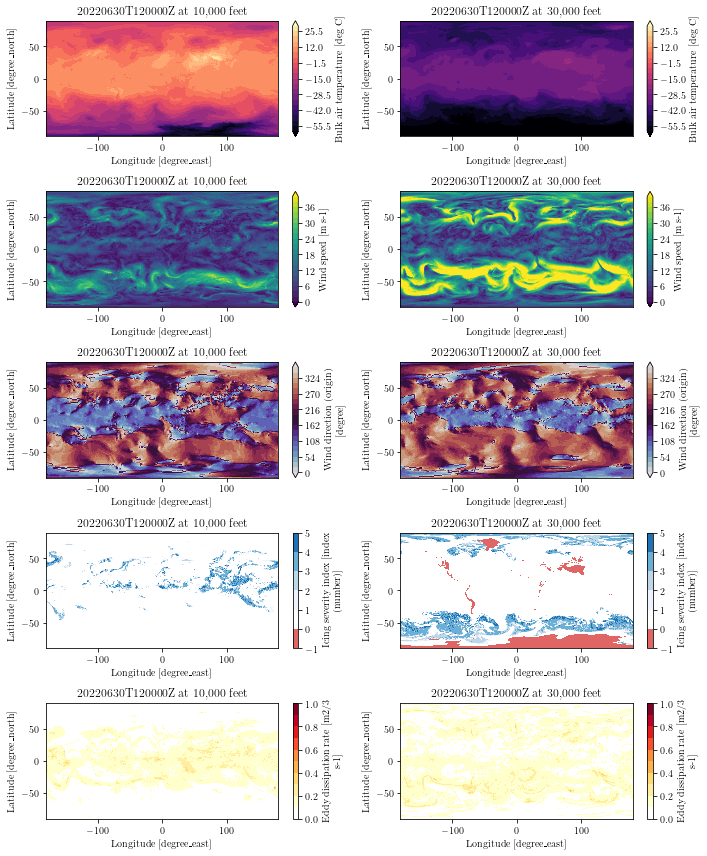

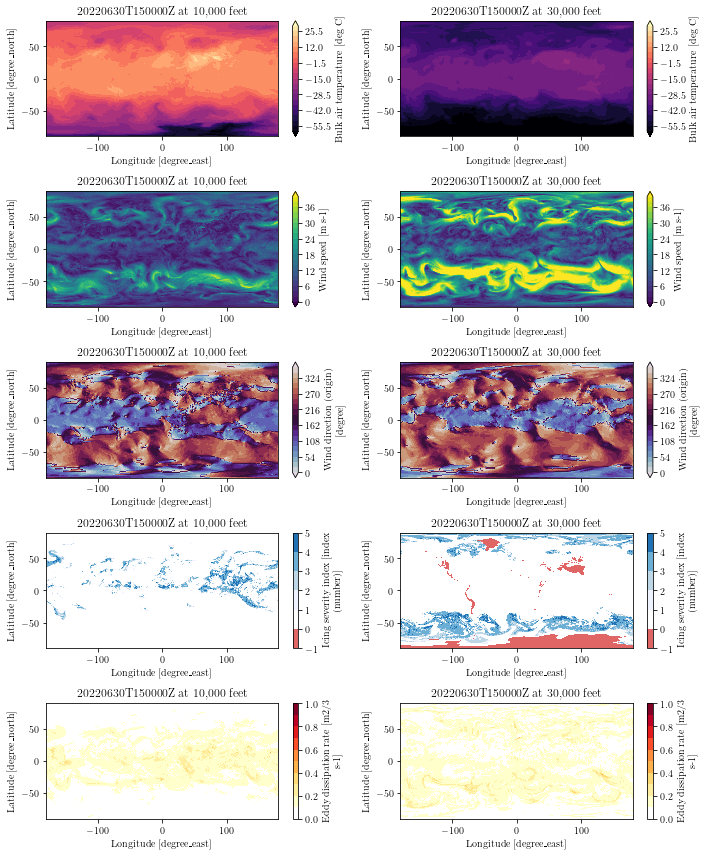

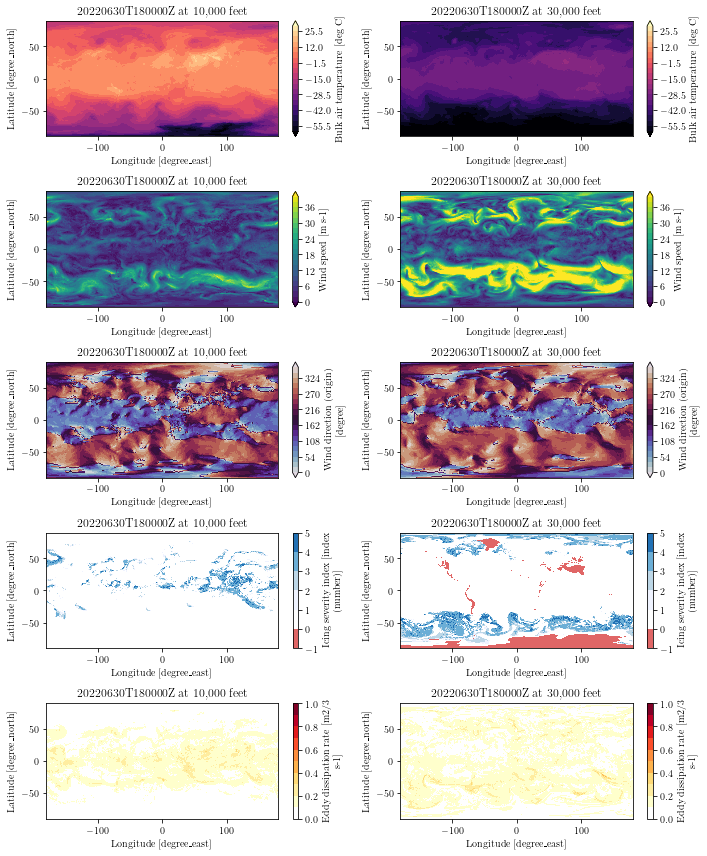

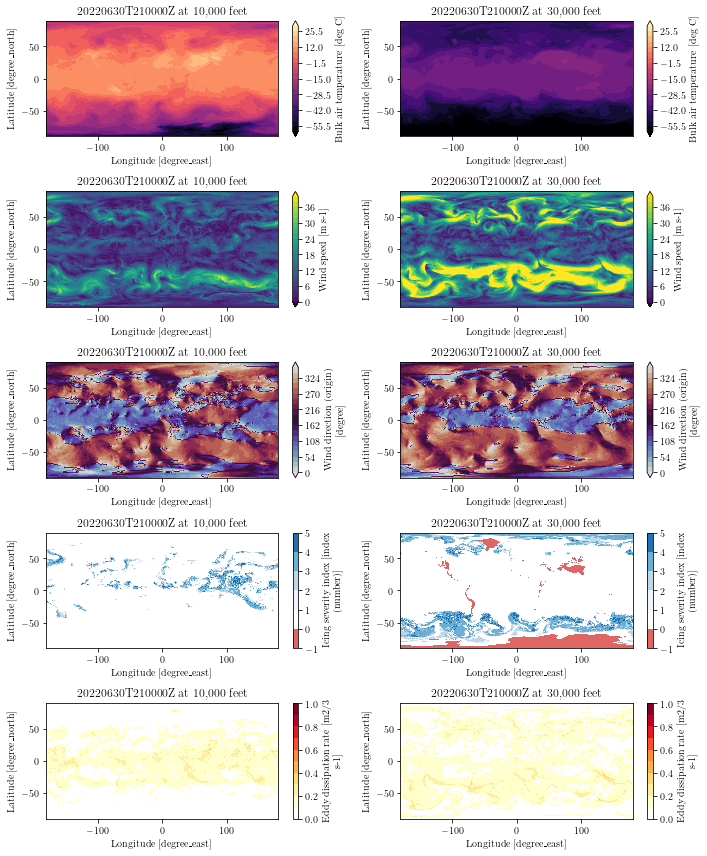

In [99]:
for index_hour, hour in enumerate(hours):
    forecast_time = pd.to_datetime("20220630T000000Z") + pd.Timedelta(hours=hour)
    batch_timestamp = forecast_time - pd.Timedelta(hours=batch_hours[index_hour])
    forecast_time_formatted = forecast_time.isoformat().replace('-', '').replace(':', '').replace('+0000', 'Z')
    batch_timestamp_formatted = batch_timestamp.isoformat().replace('-', '').replace(':', '').replace('+0000', 'Z')

    ds_wind_temp = xr.open_dataset(
        f"wafs_[wind_temp]_{batch_timestamp_formatted}_[{forecast_time_formatted}].nc"
    )
    ds_ice = xr.open_dataset(f"wafs_[ice]_{batch_timestamp_formatted}_[{forecast_time_formatted}].nc")
    ds_turb = xr.open_dataset(f"wafs_[turb]_{batch_timestamp_formatted}_[{forecast_time_formatted}].nc")

    variables = [
        "air_temperature_aviation",
        "wind_speed_aviation",
        "wind_direction_aviation",
        "icing_severity_index_aviation",
        "eddy_dissipation_rate_aviation",
    ]

    fig = plt.figure(1, figsize=(10, 12))
    gs = gridspec.GridSpec(5, 2)
    
    plot_count = 0
    for variable in variables:
        for height in [10000, 30000]:
            add_colorbar = True if plot_count % 2 == 0 else True
            ax = fig.add_subplot(gs[plot_count])
            if variable == "icing_severity_index_aviation":
                ds_ice[variable].sel(lev=height).plot(
                    ax=ax, levels=levels[variable], colors=colors[variable],
                    add_colorbar=add_colorbar, 
                )
            elif variable == "eddy_dissipation_rate_aviation":
                ds_turb[variable].sel(lev=height).plot(
                    ax=ax, levels=levels[variable], colors=colors[variable],
                    add_colorbar=add_colorbar,
                )
            else:
                ds_wind_temp[variable].sel(lev=height).plot(
                    ax=ax,
                    levels=levels[variable],
                    cmap=colors[variable],
                    extend='both',
                    add_colorbar=add_colorbar,
                )
            #plt.axis('off')
            plt.title(f'{forecast_time_formatted} at {height:,} feet')
            plot_count += 1

    plt.tight_layout()
    plt.savefig(f"wafs_{forecast_time_formatted}_dpi300.png", dpi=300, facecolor='white', bbox_inches="tight")
    plt.show()

In [101]:
filenames = sorted(glob.glob(f"wafs_20220630T*Z_dpi300.png"))
images = []

for filename in filenames:
    images.append(imageio.v2.imread(filename))

imageio.mimwrite(f"wafs_20220630T_all-variables_dpi300.gif", images, fps=5)

In [ ]:
import xarray as xr

ds_wind_temp = xr.open_dataset(
    "wafs_[wind_temp]_20220615T000000Z_[20220615T060000Z].nc"
)
ds_ice = xr.open_dataset("wafs_[ice]_20220615T000000Z_[20220615T060000Z].nc")
ds_turb = xr.open_dataset("wafs_[turb]_20220615T000000Z_[20220615T060000Z].nc")

ds_wind_temp["air_temperature_aviation"].interp(
    lev=12345, kwargs={"fill_value": "extrapolate"}
)

ds_ice["icing_severity_index_aviation"].interp(
    lev=12345, kwargs={"fill_value": "extrapolate"}
)

ds_turb["eddy_dissipation_rate_aviation"].interp(
    lev=12345, kwargs={"fill_value": "extrapolate"}
).plot();

In [ ]:
for var in ds_wind_temp.data_vars:
    print(ds_wind_temp[var].dims)

In [ ]:
for var in ds_ice.data_vars:
    print(ds_ice[var].dims)

In [ ]:
for var in ds_turb.data_vars:
    print(ds_turb[var].dims)

In [ ]:
ds_wind_temp.air_temperature_aviation.values[0]

In [ ]:
ds_wind_temp.wind_speed_aviation.values[0]

In [ ]:
ds_wind_temp.wind_direction_aviation.values[0]

In [ ]:
ds_ice.icing_severity_index_aviation.min()

In [ ]:
ds_wind_temp.air_temperature_aviation.sel(lev=10000).plot()

In [ ]:
ds_wind_temp.air_temperature_aviation.interp(
    lev=1, kwargs={"fill_value": "extrapolate"}
).plot()

In [ ]:
variable = "icing_severity_index_aviation"

In [ ]:
ds_ice[variable].interp(lev=11050, kwargs={"fill_value": "extrapolate"}).plot(
    levels=levels[variable], colors=colors[variable]
)

In [ ]:
variable = "eddy_dissipation_rate_aviation"

In [ ]:
ds_turb[variable].interp(lev=11050, kwargs={"fill_value": "extrapolate"}).plot(
    levels=levels[variable], colors=colors[variable]
)

In [ ]:
ingress-met_model-WAF-2022-06-29-KWBC-00-Wind_temp-20220629_0000f06.grib2
ingress-met_model-WAF-2022-06-28-KWBC-18-Wind_temp-20220628_1800f06.grib2

In [ ]:
import xarray as xr

In [ ]:
ds_uk = xr.open_dataset(
    "ingress_met_model_WAF_2022_06_29_EGRR_00_Wind_temp_20220629_0000f06.grib2",
    engine="cfgrib",
    filter_by_keys={"typeOfLevel": "isobaricInhPa"},
)
ds_uk

## Table for Confluence

In [ ]:
ds_raw_grib_wind_temp = xr.open_dataset(
    "ingress_met_model_WAF_2022_06_17_KWBC_00_Wind_temp_20220617_0000f06.grib2",
    engine="cfgrib",
    filter_by_keys={"typeOfLevel": "isobaricInhPa"},
)
ds_raw_grib_ice = xr.open_dataset(
    "ingress_met_model_WAF_2022_06_17_KWBC_00_ice_20220617_0000f06_ice.grib2",
    engine="cfgrib",
    filter_by_keys={"typeOfLevel": "isobaricInhPa"},
)
ds_raw_grib_turb = xr.open_dataset(
    "ingress_met_model_WAF_2022_06_17_KWBC_00_turb_20220617_0000f06_turb.grib2",
    engine="cfgrib",
    filter_by_keys={"typeOfLevel": "isobaricInhPa"},
)

In [ ]:
pressure_levels_wind_temp = ds_raw_grib_wind_temp.isobaricInhPa.values.astype(int)
pressure_levels_ice = ds_raw_grib_ice.isobaricInhPa.values.astype(int)
pressure_levels_turb = ds_raw_grib_turb.isobaricInhPa.values.astype(int)

In [ ]:
def pressure_to_height_1000ft(pressure_levels):
    height_1000ft = np.round(
        mpcalc.pressure_to_height_std((pressure_levels * units("hPa")))
        .metpy.convert_units("ft")
        .metpy.magnitude,
        -3,
    ).astype(int)
    return height_1000ft

In [ ]:
flight_altitudes_wind_temp = pressure_to_height_1000ft(
    ds_raw_grib_wind_temp.isobaricInhPa
)
flight_altitudes_ice = pressure_to_height_1000ft(ds_raw_grib_ice.isobaricInhPa)
flight_altitudes_turb = pressure_to_height_1000ft(ds_raw_grib_turb.isobaricInhPa)

In [ ]:
flight_levels_wind_temp = [
    f"FL{str(flight_altitude)[:-2].zfill(3)}"
    for flight_altitude in flight_altitudes_wind_temp
]
flight_levels_ice = [
    f"FL{str(flight_altitude)[:-2].zfill(3)}"
    for flight_altitude in flight_altitudes_ice
]
flight_levels_turb = [
    f"FL{str(flight_altitude)[:-2].zfill(3)}"
    for flight_altitude in flight_altitudes_turb
]

In [ ]:
df_wind_temp = pd.DataFrame(
    {
        "Pressure level (hPa)": pressure_levels_wind_temp,
        "Flight level (ft, approximate)": flight_altitudes_wind_temp,
        "Flight level (FL)": flight_levels_wind_temp,
    }
)
df_ice = pd.DataFrame(
    {
        "Pressure level (hPa)": pressure_levels_ice,
        "Flight level (ft, approximate)": flight_altitudes_ice,
        "Flight level (FL)": flight_levels_ice,
    }
)
df_turb = pd.DataFrame(
    {
        "Pressure level (hPa)": pressure_levels_turb,
        "Flight level (ft, approximate)": flight_altitudes_turb,
        "Flight level (FL)": flight_levels_turb,
    }
)

In [ ]:
df_wind_temp

In [ ]:
df_ice

In [ ]:
df_turb

## Checking forecast smoothness over day

### Creating gif

In [ ]:
import glob

import imageio

In [ ]:
ds_20220630T000000Z = xr.open_dataset(
    "wafs_[wind_temp]_20220629T180000Z_[20220630T000000Z].nc"
)
ds_20220630T030000Z = xr.open_dataset(
    "wafs_[wind_temp]_20220629T180000Z_[20220630T030000Z].nc"
)
ds_20220630T060000Z = xr.open_dataset(
    "wafs_[wind_temp]_20220630T000000Z_[20220630T060000Z].nc"
)
ds_20220630T090000Z = xr.open_dataset(
    "wafs_[wind_temp]_20220630T000000Z_[20220630T090000Z].nc"
)
ds_20220630T120000Z = xr.open_dataset(
    "wafs_[wind_temp]_20220630T060000Z_[20220630T120000Z].nc"
)
ds_20220630T150000Z = xr.open_dataset(
    "wafs_[wind_temp]_20220630T060000Z_[20220630T150000Z].nc"
)
ds_20220630T180000Z = xr.open_dataset(
    "wafs_[wind_temp]_20220630T120000Z_[20220630T180000Z].nc"
)
ds_20220630T210000Z = xr.open_dataset(
    "wafs_[wind_temp]_20220630T120000Z_[20220630T210000Z].nc"
)

In [ ]:
levels = {
    "3000": np.linspace(-40, 40, 21),
    "30000": np.linspace(-65, -25, 21),
}
colors = {
    "3000": "RdBu_r",
    "30000": "Blues_r",
}

In [ ]:
for height in [3000, 30000]:
    for ds in [
        ds_20220630T000000Z,
        ds_20220630T030000Z,
        ds_20220630T060000Z,
        ds_20220630T090000Z,
        ds_20220630T120000Z,
        ds_20220630T150000Z,
        ds_20220630T180000Z,
        ds_20220630T210000Z,
    ]:
        forecast_time = ds.attrs["forecast_time"].replace("-", "").replace(":", "")
        ds["air_temperature_aviation"].sel(lev=height).plot(
            levels=levels[str(height)],
            extend="both",
            cmap=colors[str(height)],
        )
        plt.title(forecast_time)
        plt.tight_layout()
        plt.savefig(f"wafs_{forecast_time}_{height}ft.png", bbox_inches="tight")
        plt.show()

In [ ]:
filenames = sorted(glob.glob(f"wafs_20220630T*_{height}ft.png"))
filenames

In [ ]:
for height in ["3000", "30000"]:
    images = []
    filenames = sorted(glob.glob(f"wafs_20220630T*_{height}ft.png"))
    for filename in filenames:
        images.append(imageio.v2.imread(filename))

    imageio.mimwrite(f"wafs_20220630T_{height}ft.gif", images, fps=5)

## Combine datasets by adding time dim/coord

In [ ]:
import pandas as pd

In [ ]:
def add_time_coord_dim(ds: xr.Dataset) -> xr.Dataset:
    """Add time as a coordinate and dimension."""
    time = pd.to_datetime(ds.attrs["forecast_time"])
    ds = ds.assign_coords(time=time).expand_dims(dim="time")
    return ds

In [ ]:
def change_attrs_times_to_daily(ds: xr.Dataset) -> xr.Dataset:
    """Change forecast time to daily."""
    time = pd.to_datetime(ds.attrs["forecast_time"])
    ds.attrs["forecast_time"] = time.strftime("%Y%m%d")
    return ds

In [ ]:
datasets = [
    ds_20220630T000000Z,
    ds_20220630T030000Z,
    ds_20220630T060000Z,
    ds_20220630T090000Z,
    ds_20220630T120000Z,
    ds_20220630T150000Z,
    ds_20220630T180000Z,
    ds_20220630T210000Z,
]

In [ ]:
datasets = [change_attrs_times_to_daily(add_time_coord_dim(ds)) for ds in datasets]

In [ ]:
ds_combined = xr.combine_by_coords(datasets, combine_attrs="drop_conflicts")

In [ ]:
ds_combined

In [ ]:
ds_combined.time

In [ ]:
ds_combined["air_temperature_aviation"].isel(lev=0).plot(col="time", col_wrap=4);

In [ ]:
np.testing.assert_allclose(ds_uk.isobaricInhPa.values, ds_test.isobaricInhPa.values)

In [ ]:
pressure_altitude = ds_test.isobaricInhPa

In [ ]:
ds_converted = pressure_altitude.metpy.quantify()
ds_converted

In [ ]:
np.round(
    mpcalc.pressure_to_height_std((pressure_altitude * units("hPa")))
    .metpy.convert_units("ft")
    .metpy.magnitude,
    -3,
)

In [ ]:
ds_test.gh.isel(isobaricInhPa=0)

In [ ]:
prod_wafs_bilinear_145x288_721x1440_peri.nc

In [ ]:
ds_test.valid_time

In [ ]:
ds_turb.lat

In [ ]:
ds_wind_temp.lat

In [ ]:
ds_ice.lat

In [ ]:
ds_zarr = xr.open_zarr("20220617T000000Z.zarr")
ds_zarr

In [ ]:
ds_zarr.flight_levels_ft

In [ ]:
ds_zarr.attrs["batch_timestamp"]

In [ ]:
ds_nc["air_temperature"].sel(flight_levels_ft=55000).plot()

In [ ]:
ds_zarr["air_temperature"].sel(flight_levels_ft=55000).plot()

In [ ]:
ds_nc["air_temperature"].interp(
    flight_levels_ft=56123, kwargs={"fill_value": "extrapolate"}
).plot()

In [ ]:
ds_zarr["air_temperature"].interp(
    flight_levels_ft=56000, kwargs={"fill_value": "extrapolate"}
).plot()

In [ ]:
YEAR = "2022"
MONTH = "06"
DAY = "17"
HOUR = "00"
FORECAST_HOUR = "06"

TEST_DATA_PATH = "."

GOOGLE_APPLICATION_CREDENTIALS = os.environ["GOOGLE_APPLICATION_CREDENTIALS"]
storage_client = storage.Client("climacell-research")
bucket = storage_client.get_bucket("wxapps-dev-static-files")
filepath_blobs = f"wafs/ingress/met_model/WAF/{YEAR}/{MONTH}/{DAY}/KWBC/{HOUR}"

for variable in ["Wind_temp", "ice", "turb"]:
    if variable == "Wind_temp":
        filepath_blob = f"ingress_met_model_WAF_{YEAR}_{MONTH}_{DAY}_KWBC_{HOUR}_{variable}_{YEAR}{MONTH}{DAY}_{HOUR}00f{FORECAST_HOUR}.grib2"
    else:
        filepath_blob = f"ingress_met_model_WAF_{YEAR}_{MONTH}_{DAY}_KWBC_{HOUR}_{variable}_{YEAR}{MONTH}{DAY}_{HOUR}00f{FORECAST_HOUR}_{variable}.grib2"

    blob = bucket.blob(f"{filepath_blobs}/{variable}/{filepath_blob}")
    blob.download_to_filename(f"{TEST_DATA_PATH}/{filepath_blob}")

In [ ]:
metadata_config = {
    "runtime": {
        "infile_wind": f"{TEST_DATA_PATH}/ingress_met_model_WAF_{YEAR}_{MONTH}_{DAY}_KWBC_{HOUR}_Wind_temp_{YEAR}{MONTH}{DAY}_{HOUR}00f{FORECAST_HOUR}.grib2",
        "infile_ice": f"{TEST_DATA_PATH}/ingress_met_model_WAF_{YEAR}_{MONTH}_{DAY}_KWBC_{HOUR}_ice_{YEAR}{MONTH}{DAY}_{HOUR}00f{FORECAST_HOUR}_ice.grib2",
        "infile_turb": f"{TEST_DATA_PATH}/ingress_met_model_WAF_{YEAR}_{MONTH}_{DAY}_KWBC_{HOUR}_turb_{YEAR}{MONTH}{DAY}_{HOUR}00f{FORECAST_HOUR}_turb.grib2",
        "out_prefix": "aviation_flight_levels",
        "ignore_warning": True,
    },
}

In [ ]:
ds_raw_grib = xr.open_dataset(
    metadata_config["runtime"]["infile_wind"],
    engine="cfgrib",
    backend_kwargs={"filter_by_keys": {"typeOfLevel": "isobaricInhPa"}},
)

In [ ]:
ds_raw_grib["t"].isel(isobaricInhPa=0).plot()

In [ ]:
import xarray as xr

In [ ]:
from google.cloud import storage

In [ ]:
import os

GOOGLE_APPLICATION_CREDENTIALS = os.environ["GOOGLE_APPLICATION_CREDENTIALS"]

In [ ]:
storage_client = storage.Client("climacell-research")
bucket = storage_client.get_bucket("wxapps-dev-static-files")
blob = bucket.blob(
    "wafs/ingress/met_model/WAF/2022/06/17/KWBC/00/turb/ingress_met_model_WAF_2022_06_17_KWBC_00_turb_20220617_0000f06_turb.grib2"
)
blob.download_to_filename("local_grib.grib")

In [ ]:
[f for f in bucket.list_blobs()]

In [ ]:
filename = "wxapps-dev-static-files/wafs/ingress/met_model/WAF/2022/06/17/KWBC/00/turb/ingress_met_model_WAF_2022_06_17_KWBC_00_turb_20220617_0000f06_turb.grib2"
with gcp_filesystem.open(filename) as f:
    ds_grib = xr.open_dataset(
        f,
        backend_kwargs={
            "filter_by_keys": {"typeOfLevel": "isobaricInhPa"},
        },
        engine="cfgrib",
    )

In [ ]:
ds_grib

In [ ]:
ds = xr.open_dataset(
    "gs://climacell-artemis-staging/ingress/met_model/WAF/2022/05/23/KWBC/18/Wind_temp/20220523_1800f06.grib2",
    backend_kwargs={
        "storage_options": {"project": "climacell-research", "token": token},
        "filter_by_keys": {"typeOfLevel": "isobaricInhPa"},
    },
    engine="cfgrib",
)
ds

In [ ]:
ds["air_temperature"].sel(flight_levels_ft=48000).plot()
ds["air_temperature"].interp(flight_levels_ft=49000).plot()

In [ ]:
ds["air_temperature"].interp(flight_levels_ft=49000).plot()

In [ ]:
import pygrib

In [ ]:
ds_raw_grib = xr.open_dataset(
    "ingress_met_model_WAF_2022_06_17_KWBC_00_Wind_temp_20220617_0000f06.grib2",
    engine="cfgrib",
    backend_kwargs={"filter_by_keys": {"typeOfLevel": "isobaricInhPa"}},
)

In [ ]:
metadata_config = {}
metadata_config["output"] = {
    "flight_lev_bottom": 3_000,
    "flight_lev_top": 56_000,
    "flight_lev_step": 1_000,
    "ice_flight_levs": [6_000, 10_000, 14_000, 18_000, 24_000, 30_000],
    "turb_flight_levs": [
        10_000,
        14_000,
        18_000,
        24_000,
        27_000,
        30_000,
        34_000,
        39_000,
        45_000,
    ],
    "var_list": ["wind_speed", "wind_direction", "air_temperature"],
}

In [ ]:
height_levels_to_use = "interpolate_from_3000_to_55000"

if height_levels_to_use == "interpolate_from_3000_to_55000":
    flight_levels = list(
        range(
            metadata_config["output"]["flight_lev_bottom"],
            metadata_config["output"]["flight_lev_top"],
            metadata_config["output"]["flight_lev_step"],
        )
    )

In [ ]:
flight_levels

In [ ]:
ds_raw_grib

In [ ]:
import metpy.calc as mpcalc
import numpy as np
from metpy.units import units

In [ ]:
ds = ds_raw_grib.metpy.quantify()

In [ ]:
u_wind_component = ds_raw_grib["u"] * units("m/s")
v_wind_component = ds_raw_grib["v"] * units("m/s")
wind_speed = mpcalc.wind_speed(u_wind_component, v_wind_component)
wind_direction = mpcalc.wind_direction(u_wind_component, v_wind_component)

In [ ]:
wind_speed

In [ ]:
# quantify() for the conversion, then dequantify() for writing to disk
ds_raw_grib["t"].metpy.quantify().metpy.convert_units("degC")

In [ ]:
# change back from Pint Quantities for writing to disk
wind_speed = wind_speed.metpy.dequantify()
wind_direction = wind_direction.metpy.dequantify()
air_temperature = air_temperature.metpy.dequantify()

In [ ]:
(ds_raw_grib.isobaricInhPa.metpy.quantify() * units["hPa"])

In [ ]:
(ds_raw_grib.isobaricInhPa * units["hPa"])

In [ ]:
ds_raw_grib.isobaricInhPa

In [ ]:
def convert_pressure_to_height(
    ds: xr.Dataset,
    old_height_dimension: str,
    new_height_dimension: str,
    old_units: str,
    new_units: str,
) -> xr.Dataset:
    """Convert vertical dimension from pressure to height.

    Parameters
    ----------
    ds : xr.Dataset
        original raw grib dataset with pressure vertical dimension
    old_height_dimension : str
        original height dimension name
    new_height_dimension : str
        new height dimension name
    old_units : str
        original height dimension units
    new_units : str
        new height dimension units

    Returns
    -------
    xr.Dataset
        converted dataset with height vertical dimension
    """
    ds_converted = ds.metpy.quantify()
    ds_converted[old_height_dimension] = mpcalc.pressure_to_height_std(
        (ds[old_height_dimension] * units(old_units))
    ).metpy.convert_units(new_units)
    ds_converted = ds_converted.rename_dims(
        {old_height_dimension: new_height_dimension}
    )
    ds_converted = ds_converted.rename_vars(
        {old_height_dimension: new_height_dimension}
    )
    ds_converted = ds_converted.metpy.dequantify()
    return ds_converted


def interpolate_to_flight_altitudes(
    ds: xr.Dataset, flight_altitudes: list
) -> xr.Dataset:
    """Interpolate dataset to given flight altitudes.

    For now the vertical dimension name is hard-coded
    in as flight_altitude_wind_temp

    Parameters
    ----------
    ds : xr.Dataset
        converted dataset with height vertical dimension
    flight_altitudes : list
        list of flight altitudes to interpolate to (same units as the height dimension)

    Returns
    -------
    xr.Dataset
        interpolated dataset
    """
    ds_interpolated = ds.interp(
        flight_altitude_wind_temp=flight_altitudes,
        kwargs={"fill_value": "extrapolate"},
    )
    return ds_interpolated

In [ ]:
def add_icing(ds_out: xr.Dataset, icing_file: str) -> xr.Dataset:
    """Add icing dataarray to WAFS dataset.

    No interpolation required as only at specific heights.
    No regridding is required as already on 0.25 degree grid,
    however do need to normalise the longitude to be between
    -180 and 180 degrees, rather than 0 and 360 degrees.

    Parameters
    ----------
    ds_out : xr.Dataset
        output dataset without icing
    icing_file : str
        filename for icing data

    Returns
    -------
    ds_out : xr.Dataset
        output dataset with icing
    """
    logger.info(f"Opening WAFS icing file {icing_file}")
    ds_icing = open_grib_dataset(icing_file, height_dimension="isobaricInhPa")

    ds_icing = ds_icing.reindex(isobaricInhPa=list(reversed(ds_icing.isobaricInhPa)))
    ds_icing = ds_icing.assign_coords(
        flight_altitude_ice=(metadata_config["output"]["ice_flight_levs"])
    )
    ds_icing["unknown"] = ds_icing["unknown"].swap_dims(
        {"isobaricInhPa": "flight_altitude_ice"}
    )
    ds_icing = ds_icing.drop_vars(["isobaricInhPa"])
    ds_icing = ds_icing.rename(
        {
            "unknown": "icing_severity_index",
            "longitude": "lon",
            "latitude": "lat",
        }
    )
    ds_icing["icing_severity_index"].attrs = {}

    ds_icing = normalise_longitude_coords(ds_icing, "lon")
    # reindex lats to be in the reverse direction to match other dataarrays i.e., -90 to 90
    ds_icing = ds_icing.reindex(lat=list(reversed(ds_icing.lat)))

    ds_out = ds_out.assign(icing_severity_index=ds_icing["icing_severity_index"])
    return ds_out


def add_turbulence(ds_out: xr.Dataset, turbulence_file: str) -> xr.Dataset:
    """Add turbulence dataarray to WAFS dataset.

    No interpolation is required as only at specific heights.
    No regridding is required as already on 0.25 degree grid,
    however do need to normalise the longitude to be between
    -180 and 180 degrees, rather than 0 and 360 degrees.

    Parameters
    ----------
    ds_out : xr.Dataset
        output dataset without turbulence
    turbulence_file : str
        filename for turbulence data

    Returns
    -------
    ds_out : xr.Dataset
        output dataset with turbulence
    """
    logger.info(f"Opening WAFS turbulence file {turbulence_file}")
    ds_turbulence = open_grib_dataset(turbulence_file, height_dimension="isobaricInhPa")

    ds_turbulence = ds_turbulence.reindex(
        isobaricInhPa=list(reversed(ds_turbulence.isobaricInhPa))
    )
    ds_turbulence = ds_turbulence.assign_coords(
        flight_altitude_turb=(metadata_config["output"]["turb_flight_levs"])
    )
    ds_turbulence["unknown"] = ds_turbulence["unknown"].swap_dims(
        {"isobaricInhPa": "flight_altitude_turb"}
    )
    ds_turbulence = ds_turbulence.drop_vars(["isobaricInhPa"])
    ds_turbulence = ds_turbulence.rename(
        {
            "unknown": "eddy_dissipation_rate",
            "longitude": "lon",
            "latitude": "lat",
        }
    )
    ds_turbulence["eddy_dissipation_rate"].attrs = {}
    ds_turbulence["eddy_dissipation_rate"] = ds_turbulence[
        "eddy_dissipation_rate"
    ].round(metadata_config["variable_attrs"]["eddy_dissipation_rate"]["precision"])

    ds_turbulence = normalise_longitude_coords(ds_turbulence, "lon")
    # reindex lats to be in the reverse direction to match other dataarrays i.e., -90 to 90
    ds_turbulence = ds_turbulence.reindex(lat=list(reversed(ds_turbulence.lat)))

    ds_out = ds_out.assign(eddy_dissipation_rate=ds_turbulence["eddy_dissipation_rate"])
    return ds_out

In [ ]:
ds_raw_grib = xr.open_dataset(
    "ingress_met_model_WAF_2022_06_17_KWBC_00_Wind_temp_20220617_0000f06.grib2",
    engine="cfgrib",
    backend_kwargs={"filter_by_keys": {"typeOfLevel": "isobaricInhPa"}},
)

In [ ]:
u_wind_component = ds_raw_grib["u"] * units("m/s")
v_wind_component = ds_raw_grib["v"] * units("m/s")
wind_speed = mpcalc.wind_speed(u_wind_component, v_wind_component)
wind_direction = mpcalc.wind_direction(u_wind_component, v_wind_component)

air_temperature = ds_raw_grib["t"].metpy.convert_units("degC")

# change back from Pint Quantities for writing to disk
wind_speed = wind_speed.metpy.dequantify()
wind_direction = wind_direction.metpy.dequantify()
air_temperature = air_temperature.metpy.dequantify()

ds_raw_grib_combined = xr.combine_by_coords(
    [
        xr.Dataset({"air_temperature": air_temperature}),
        xr.Dataset({"wind_speed": wind_speed}),
        xr.Dataset({"wind_direction": wind_direction}),
    ]
)

ds_raw_grib_converted = convert_pressure_to_height(
    ds_raw_grib_combined,
    old_height_dimension="isobaricInhPa",
    new_height_dimension="flight_altitude_wind_temp",
    old_units="hPa",
    new_units="ft",
)
flight_altitudes = list(
    range(
        metadata_config["output"]["flight_lev_bottom"],
        metadata_config["output"]["flight_lev_top"],
        metadata_config["output"]["flight_lev_step"],
    )
)
ds_raw_grib_interpolated = interpolate_to_flight_altitudes(
    ds_raw_grib_converted,
    flight_altitudes,
)

In [ ]:
ds_raw_grib_interpolated

In [ ]:
ds_interpolated_regridded_0p25 = regrid_ds(ds_raw_grib_interpolated)

In [ ]:
ds_raw_grib.flight_altitude

In [ ]:
ds_raw_grib["t"].isel(flight_altitude=0).plot()

In [ ]:
ds_raw_grib["t"].interp(
    flight_altitude=5000, kwargs={"fill_value": "extrapolate"}
).plot()

In [ ]:
ds_raw_grib.gh[0]

In [ ]:
metadata_config["runtime"][
    "infile_Wind_temp"
] = "../tests/test_data/ingress_met_model_WAF_2022_06_15_KWBC_00_Wind_temp_20220615_0000f06.grib2"
metadata_config["runtime"][
    "infile_ice"
] = "../tests/test_data/ingress_met_model_WAF_2022_06_15_KWBC_00_ice_20220615_0000f06_ice.grib2"
metadata_config["runtime"][
    "infile_turb"
] = "../tests/test_data/ingress_met_model_WAF_2022_06_15_KWBC_00_turb_20220615_0000f06_turb.grib2"

In [ ]:
da_0p1deg = xr.open_dataset(
    "../evapotranspiration/ingress_met_model_era5_land_all_daily_2022_02_20_era5_land_2022_02_20.nc"
).isel(time=0)["t2m"]
da_0p1deg = da_0p1deg.rename({"longitude": "lon", "latitude": "lat"})
da_0p1deg

In [ ]:
da3 = da3.rename({"longitude": "lon", "latitude": "lat"})

In [ ]:
import regionmask

land_mask_10m = regionmask.defined_regions.natural_earth_v5_0_0.land_10
# da_masked_10m = land_mask_10m.mask(da)

In [ ]:
land_mask_10m

In [ ]:
da_0p25deg = ds_0p25deg["air_temperature"].isel(flight_altitude_wind_temp=0)

In [ ]:
da_0p25deg_masked_10m = land_mask_10m.mask(da_0p25deg)
da_0p1deg_masked_10m = land_mask_10m.mask(da_0p1deg)

In [ ]:
da_0p25deg_masked_10m.plot();

In [ ]:
da_0p1deg_masked_10m.plot(xlim=[-130, -70], ylim=[20, 70]);

In [ ]:
da3_masked110 = land110.mask(da3)
da3_masked50 = land50.mask(da3)
da3_masked10 = land10.mask(da3)

In [ ]:
da3_masked110.plot(xlim=[-90, -80], ylim=[25, 35])

In [ ]:
da3_masked50.plot(xlim=[-90, -80], ylim=[25, 35])

In [ ]:
da3_masked10.plot(xlim=[-90, -80], ylim=[25, 35])

In [ ]:
land110

In [ ]:
import geopandas as gpd
from shapely.ops import unary_union

In [ ]:
gdf = gpd.read_file("../gadm404.gpkg")

In [ ]:
gdf.head()

In [ ]:
gdf.dissolve(by="geometry")

In [ ]:
world = gpd.GeoSeries(unary_union(gdf.geometry))

In [ ]:
def create_metadata_config(
    variables: Dict[str, str], coords: Dict[str, str]
) -> Dict[str, Any]:
    """Create default metadata config.

    Parameters
    ----------
    variables : Dict[str, str]
        dictionary for variables with keys from metadata standards and values used in the metadata config
    coords : Dict[str, str]
        dictionary for coords with keys from metadata standards and values used in the metadata config

    Returns
    -------
    Dict[str, Any]
        metadata config used to uopdate dataset
    """
    metadata_config = {
        "variable_attrs": {},
        "variable_encoding": {},
        "coord_attrs": {},
        "coord_encoding": {},
    }
    metadata_standards_file = "metadata_standards_v2.yaml"
    with open(metadata_standards_file, "r") as stream:
        metadata_standards = yaml.safe_load(stream)

    for variable_in_metadata_standards, variable_to_use in variables.items():
        # add "attrs", "encoding", and "meta" to da.attrs
        metadata_config["variable_attrs"].update(
            {
                variable_to_use: metadata_standards["variable"][
                    variable_in_metadata_standards
                ]["attrs"]
            }
        )
        metadata_config["variable_attrs"][variable_to_use].update(
            metadata_standards["variable"][variable_in_metadata_standards]["encoding"]
        )
        metadata_config["variable_attrs"][variable_to_use].update(
            metadata_standards["variable"][variable_in_metadata_standards]["meta"]
        )

        # add "encoding" for writing data
        metadata_config["variable_encoding"].update(
            {
                variable_to_use: metadata_standards["variable"][
                    variable_in_metadata_standards
                ]["encoding"]
            }
        )

    for coord_in_metadata_standards, coord_to_use in coords.items():
        # add "attrs", "encoding", and "meta" to da.attrs
        metadata_config["coord_attrs"].update(
            {
                coord_to_use: metadata_standards["variable"][
                    coord_in_metadata_standards
                ]["attrs"]
            }
        )
        metadata_config["coord_attrs"][coord_to_use].update(
            metadata_standards["variable"][coord_in_metadata_standards]["encoding"]
        )
        metadata_config["coord_attrs"][coord_to_use].update(
            metadata_standards["variable"][coord_in_metadata_standards]["meta"]
        )

        # add "encoding" for writing data
        metadata_config["coord_encoding"].update(
            {
                coord_to_use: metadata_standards["variable"][
                    coord_in_metadata_standards
                ]["encoding"]
            }
        )

    return metadata_config

In [ ]:
from typing import Any

In [ ]:
variables = {
    "air_temperature": "air_temperature_aviation",
}
coords = {
    "time": "time",
    "lat": "lat",
    "lon": "lon",
}

In [ ]:
time_config = create_metadata_config({}, {"time": "time"})

In [ ]:
time_config

In [ ]:
time_config["coord_attrs"]["time"]["units"] = "nano-seconds since 1970-01-01T00:00"

In [ ]:
""

In [ ]:
metadata_config["coord_encoding"]

In [ ]:
ds = add_time_coord_dim(ds)

In [ ]:
ds.time.attrs = metadata_config["coord_attrs"]["time"]

In [ ]:
int(ds.time.values[0])

In [ ]:
ds.time.values[0].dtype

In [ ]:
import numpy as np

In [ ]:
ds.time

In [ ]:
np.array(1656601200000000000, dtype="datetime64[ns]")

In [ ]:
ds.lon

In [ ]:
def add_time_coord_dim(ds: xr.Dataset, metadata_config: Dict[str, Any]) -> xr.Dataset:
    """Add (forecast) time as a coordinate and dimension.

    Parameters
    ----------
    ds : xr.Dataset
        dataset without time dim/coord
    metadata_config : Dict[str, Any]
        metadata config without time coord

    Returns
    -------
    ds : xr.Dataset
        dataset without time dim/coord
    metadata_config : Dict[str, Any]
        metadata config with time coord
    """
    time_config = create_metadata_config({}, {"time": "time"})
    time_config["coord_attrs"]["time"]["units"] = "nano-seconds since 1970-01-01T00:00"

    time = pd.to_datetime(ds.attrs["forecast_time"])
    ds = ds.assign_coords(time=time).expand_dims(dim="time")

    ds.time.attrs = time_config["coord_attrs"]["time"]

    metadata_config["coord_attrs"]["time"] = time_config["coord_attrs"]["time"]
    metadata_config["coord_encoding"]["time"] = time_config["coord_encoding"]["time"]

    return ds, metadata_config

In [ ]:
metadata_config["coord_encoding"]

In [ ]:
ds

In [ ]:
ds = xr.open_dataset(
    "../../pangeo_tools/wafs/wafs_[wind_temp]_20220630T060000Z_[20220630T150000Z].nc"
)

In [ ]:
def write_output_to_netcdf(
    ds: xr.Dataset,
    metadata_config: Dict[str, Any],
    variable: str,
    include_encoding: bool = True,
) -> str:
    """Write dataset to netcdf.

    Added encoding options and compression to reduce file size.

    Parameters
    ----------
    ds : xr.Dataset
        dataset to save
    metadata_config : Dict[str, Any]
        metadata config
    variable : str
        variable string to use for the filename
    include_encoding : bool
        whether to include encoding, by default True

    Raises
    ------
    IOError
        Failed to write the dataset to disk.

    Returns
    _______
    filename : str
        filename for the output file
    """
    data_product = "wafs"
    product_configuration = ""
    additional_identifying_details = ""
    batch_timestamp = pd.to_datetime(ds.attrs["batch_timestamp"]).strftime(
        "%Y%m%dT%H%M%SZ"
    )
    forecast_time = pd.to_datetime(ds.attrs["forecast_time"]).strftime("%Y%m%dT%H%M%SZ")
    file_extension = "nc"

    if product_configuration:
        if additional_identifying_details:
            filename = f"{data_product}_[{product_configuration}][{additional_identifying_details}][{variable}]_{batch_timestamp}_[{forecast_time}].{file_extension}"
        else:
            filename = f"{data_product}_[{product_configuration}][{variable}]_{batch_timestamp}_[{forecast_time}].{file_extension}"
    else:
        filename = f"{data_product}_[{variable}]_{batch_timestamp}_[{forecast_time}].{file_extension}"

    encoding = metadata_config["variable_encoding"] | metadata_config["coord_encoding"]

    for dictionary in encoding.keys():
        encoding[dictionary][
            "zlib"
        ] = True  # for compression, default level 90% reduction in filesize
        encoding[dictionary].pop("_FillValue", None)  # applied automatically from attrs
        encoding[dictionary].pop("valid_min", None)  # applied in update_metadata
        encoding[dictionary].pop("valid_max", None)  # applied in update_metadata
        encoding[dictionary].pop("precision", None)  # results in lossy data

    vars_and_coords = set(ds.data_vars) | set(ds.coords)
    for key in list(encoding.keys()):
        if key not in vars_and_coords:
            encoding.pop(key, None)

    if include_encoding:
        ds.to_netcdf(filename, encoding=encoding, mode="w")
    else:
        ds.to_netcdf(filename, mode="w")

    if not os.path.exists(filename):
        raise IOError("Failed to write output.")

    return filename

In [ ]:
def add_time_coord_dim(ds: xr.Dataset) -> xr.Dataset:
    """Add (forecast) time as a coordinate and dimension.

    Parameters
    ----------
    ds : xr.Dataset
        dataset without time dim/coord

    Returns
    -------
    ds : xr.Dataset
        dataset without time dim/coord
    """
    time_config = create_metadata_config({}, {"time": "time"})
    time_config["coord_attrs"]["time"].pop("units", None)
    time_config["coord_attrs"]["time"].pop("_FillValue", None)

    time = pd.to_datetime(ds.attrs["forecast_time"])

    ds = ds.assign_coords(time=time).expand_dims(dim="time")
    ds.time.attrs = time_config["coord_attrs"]["time"]

    return ds

In [ ]:
ds_time = add_time_coord_dim(ds)

In [ ]:
ds_time.time.attrs

In [ ]:
out_file = write_output_to_netcdf(
    ds_time,
    metadata_config,
    variable="wind_temp",
    include_encoding=True,
)

In [ ]:
out_file

In [ ]:
ds_time

In [ ]:
wafs_[wind_temp]_20220630T120000Z_[20220630T210000Z].nc

In [ ]:
ds3 = xr.open_dataset("wafs_[wind_temp]_20220630T120000Z_[20220630T210000Z].nc")
ds3

In [ ]:
ds3['air_temperature_aviation'].isel(lev=0).plot();

In [ ]:
ds2.time.dt.hour

In [ ]:
ds = xr.Dataset(
    data_vars={
        "a": xr.DataArray(
            np.zeros((3, 2, 2)),
            dims=("lev", "lon", "lat"),
            coords={
                "lev": [100, 200, 300],
                "lon": [10, 20],
                "lat": [10, 20],
            },
        ),
    },
    attrs={"forecast_time": "2022-06-30T21:00:00"}
)

In [ ]:
ds

In [ ]:
ds_time = add_time_coord_dim(ds)

In [ ]:
ds_time.time.dtype

In [ ]:
assert int(ds_time.time.values[0]) == 1656622800000000000

In [ ]:
ds = xr.open_dataset('wafs_wafs_[ice]_20220630T120000Z_[20220630T210000Z].nc')
ds

In [ ]:
ds['icing_severity_index_aviation']

In [ ]:
ds.time